# Table of Contents
 <p><div class="lev1"><a href="#Loading"><span class="toc-item-num">1 - </span>Loading</a></div><div class="lev1"><a href="#Functions"><span class="toc-item-num">2 - </span>Functions</a></div><div class="lev1"><a href="#Reordering"><span class="toc-item-num">3 - </span>Reordering</a></div><div class="lev2"><a href="#Global-/-Patients-/-Controls"><span class="toc-item-num">3.1 - </span>Global / Patients / Controls</a></div><div class="lev2"><a href="#Individuals"><span class="toc-item-num">3.2 - </span>Individuals</a></div><div class="lev2"><a href="#Variability"><span class="toc-item-num">3.3 - </span>Variability</a></div><div class="lev1"><a href="#Visualization"><span class="toc-item-num">4 - </span>Visualization</a></div><div class="lev2"><a href="#Groups"><span class="toc-item-num">4.1 - </span>Groups</a></div><div class="lev1"><a href="#Manu-Script"><span class="toc-item-num">5 - </span>Manu Script</a></div><div class="lev2"><a href="#Functions"><span class="toc-item-num">5.1 - </span>Functions</a></div><div class="lev2"><a href="#Subject's-choice"><span class="toc-item-num">5.2 - </span>Subject's choice</a></div><div class="lev2"><a href="#Components-read"><span class="toc-item-num">5.3 - </span>Components read</a></div><div class="lev1"><a href="#Visualization"><span class="toc-item-num">6 - </span>Visualization</a></div>

# Loading

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
from scipy.stats import ranksums
from sklearn import linear_model, svm
from scipy.fftpack import idct
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [2]:
#TS = 'TC', 'TCHD12', 'TCDAH', 'TCHD12B', 'TCDAHB', 'TCPDAB', 'TCPD12B', 'TCPDAB86', 'TCPD12B86'
TS = 'TCHD12B', 'TCHDA86B', 'TCHD1286B', 'TCPDAB', 'TCPD12B', 'TCPDAB86', 'TCPD12B86'
KS = ['p05','p06','p08','p15','p18','p19','p21',
      't03','t04','t05','t07','t08','t10','t11','t12','t13','t14','t15','t19','t20','t21']
comp = {}
for t in TS:
    comp[t] = Te.data2array('NClusters/%s.npy' %t, dic=1)

In [3]:
K = range(len(comp[TS[0]][KS[0]]))
tmp = Te.data2array('../../Connectomes/Jonathan/512/centres/p06.npy')
org, cen = tmp[:,0].astype(int)-1, tmp[:,1:]
tmp = Te.data2array('../../Connectomes/Jonathan/86/centres/p06.txt')
org86, cen86 = arange(86), tmp[:,1:]

# Functions

In [30]:
def showMe(clus, cmap='Reds'):
    figs = []
    if clus.shape[1] == 86: O, C, s = org86, cen86, 5
    else:                   O, C, s = org, cen, 1
    for k in K:
        figs.append(Td.figToHtml( Td.linesFromCenters( clus[k][O], C, 
                        fig=figure(figsize=(5,1)), s=s, intext=1, cmap=cmap, alpha=0.8, tle=k, disp=0, cbar=0) ))
    return Td.htmlTable(array([figs]).reshape(2,4), ind=0, fmt="%s")    

# Reordering
- Done again in cNTCD generation

In [24]:
print TS

('TCHD12B', 'TCHDA86B', 'TCHD1286B', 'TCPDAB', 'TCPD12B', 'TCPDAB86', 'TCPD12B86')


In [57]:
clus = comp['TCPD12B86']

## Global / Patients / Controls

In [58]:
corrGC = Tf.corrTCs(clus['g'], clus['c'])
corrGP = Tf.corrTCs(clus['g'], clus['p'])
corrPC = Tf.corrTCs(clus['p'], clus['c'])
Td.mapMatrices([corrGC, corrGP, corrPC], interpolation='nearest', lign=1, fs=(10,2), cbar=1, vmin=0, vmax=1)

In [59]:
iA, iB, iC = Tm.reorderByMaxs(corrGC, corrGP)
clus['g'] = clus['g'][iA]
clus['c'] = clus['c'][iB]
clus['p'] = clus['p'][iC]

To implement
To implement


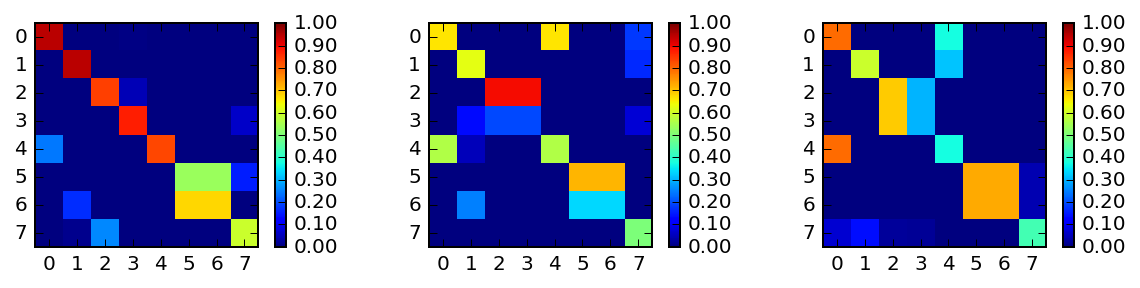

In [60]:
corrGC = Tf.corrTCs(clus['g'], clus['c'])
corrGP = Tf.corrTCs(clus['g'], clus['p'])
corrPC = Tf.corrTCs(clus['p'], clus['c'])
Td.mapMatrices([corrGC, corrGP, corrPC], interpolation='nearest', lign=1, fs=(10,2), cbar=1, vmin=0, vmax=1)

## Individuals

In [61]:
for ik, k in zip(range(len(KS)), KS):
    corr = Tf.corrTCs(clus['g'], clus[k])
    clus[k] = clus[k][Tm.reorderByMaxs(corr, iA=K)]

In [62]:
corr = empty((len(KS),len(KS),len(K),len(K)))
for i1, k1 in zip(range(len(KS)), KS):
    for i2, k2 in zip(range(len(KS)), KS):
        corr[i1,i2] = Tf.corrTCs(clus[k1], clus[k2])

In [28]:
figs = []
for i1, k1 in zip(range(len(KS)), KS):
    figs.append([])
    for i2, k2 in zip(range(len(KS)), KS):
        fig=figure(figsize=(3,3), dpi=10)
        imshow(corr[i1,i2], interpolation='nearest', vmin=0, vmax=1)
        axis('off')
        figs[i1].append( Td.figToHtml(fig) );
        close()


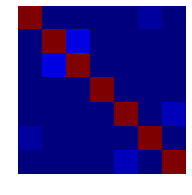
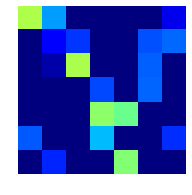
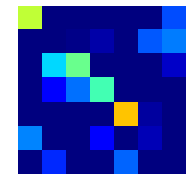
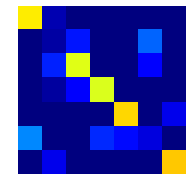
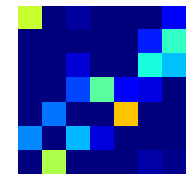
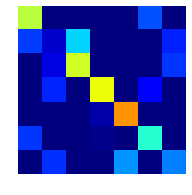
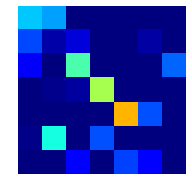
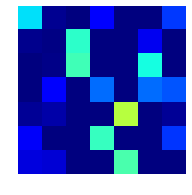
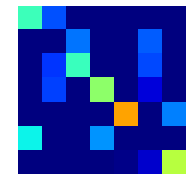
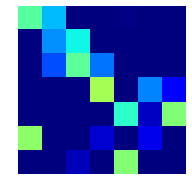
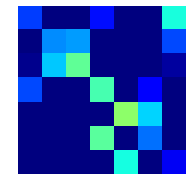
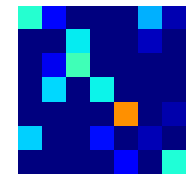
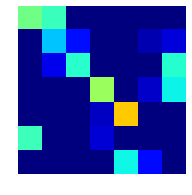
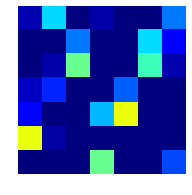
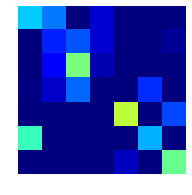
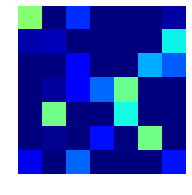
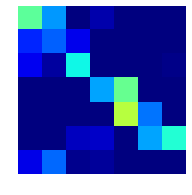
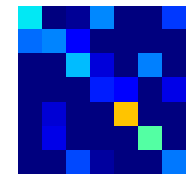
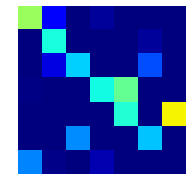
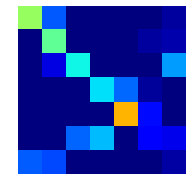
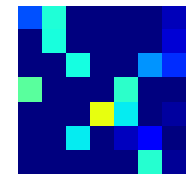
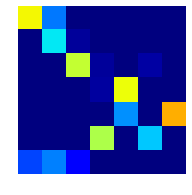
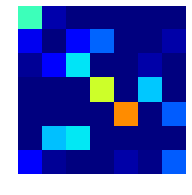
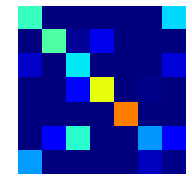
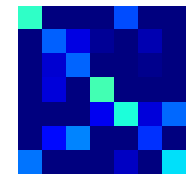
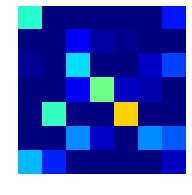
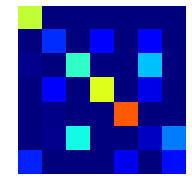
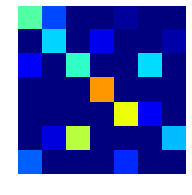
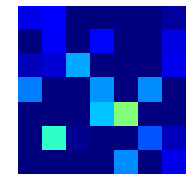
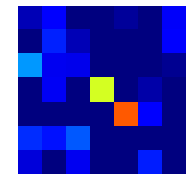
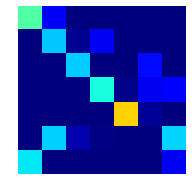
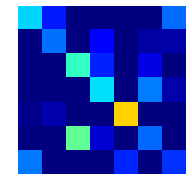
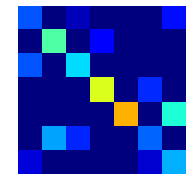
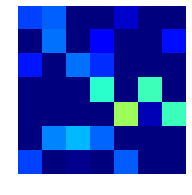
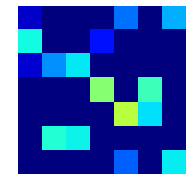
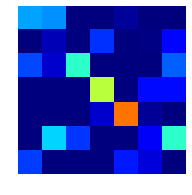
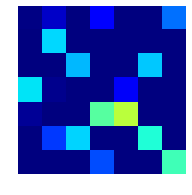
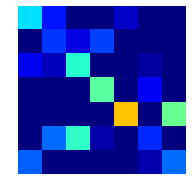
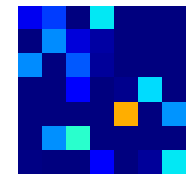
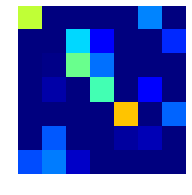
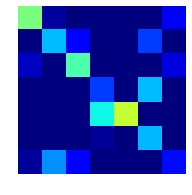
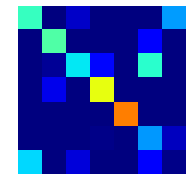
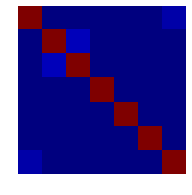
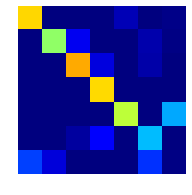
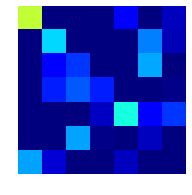
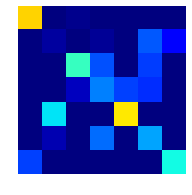
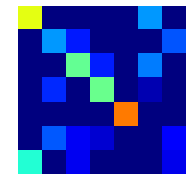
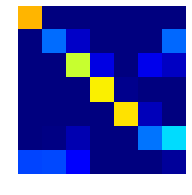
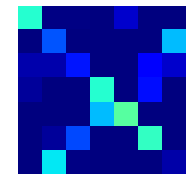
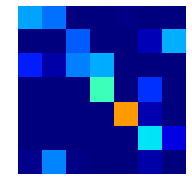
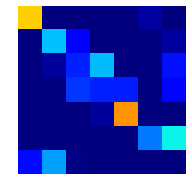
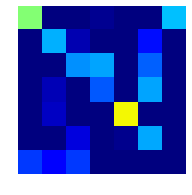
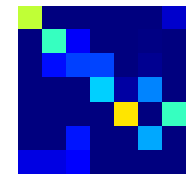
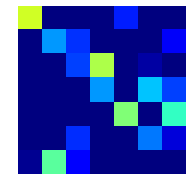
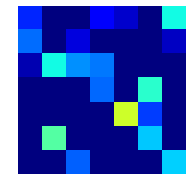
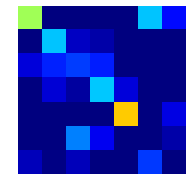
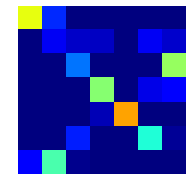
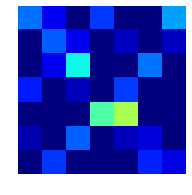
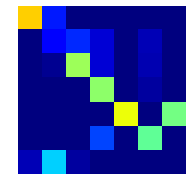
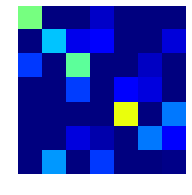
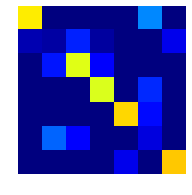
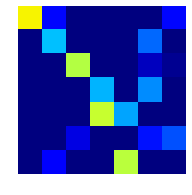
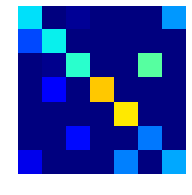
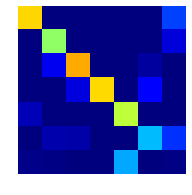
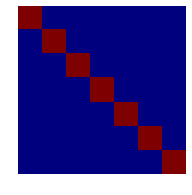
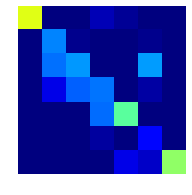
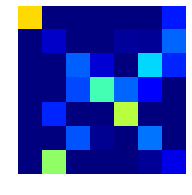
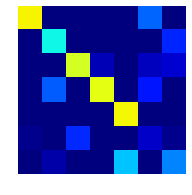
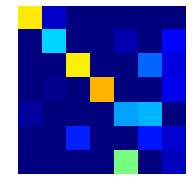
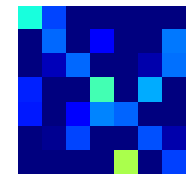
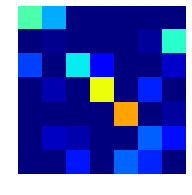
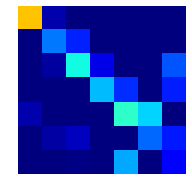
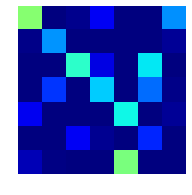
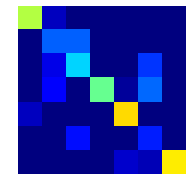
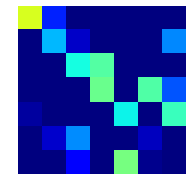
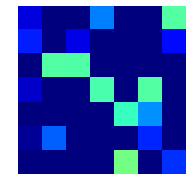
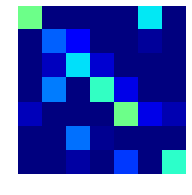
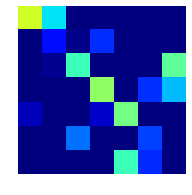
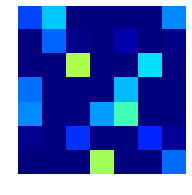
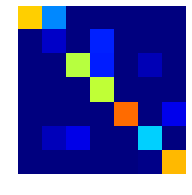
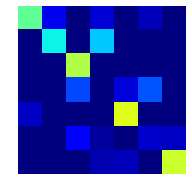
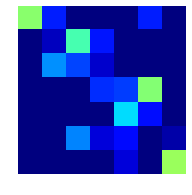
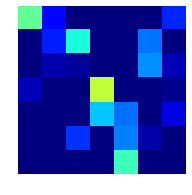
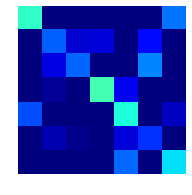
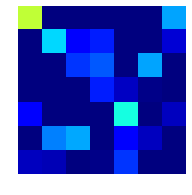
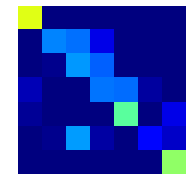
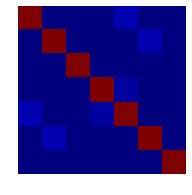
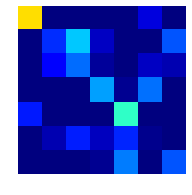
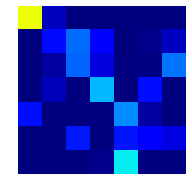
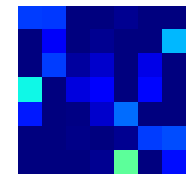
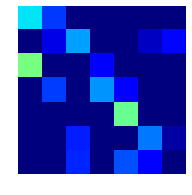
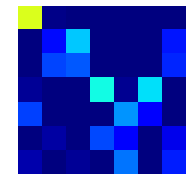
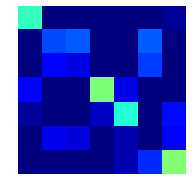
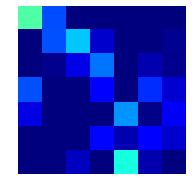
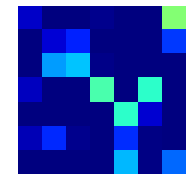
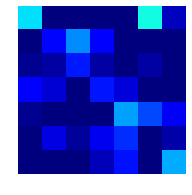
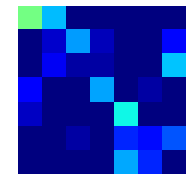
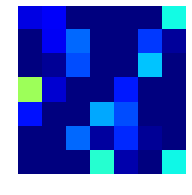
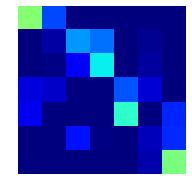
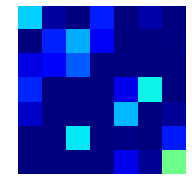
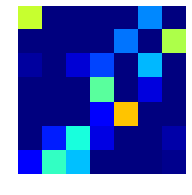
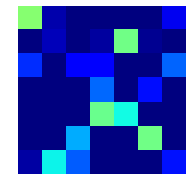
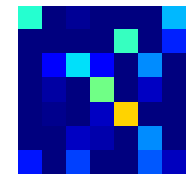
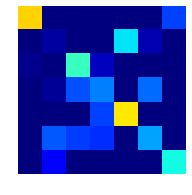
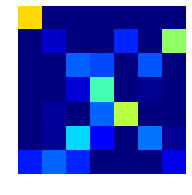
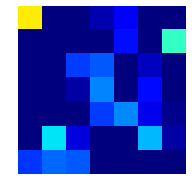
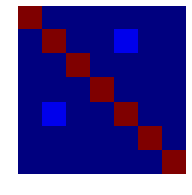
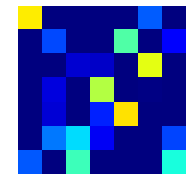
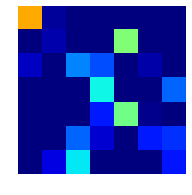
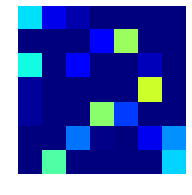
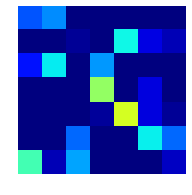
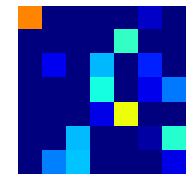
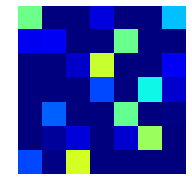
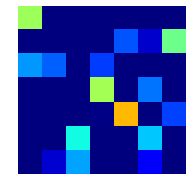
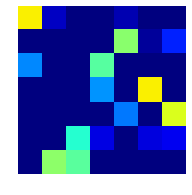
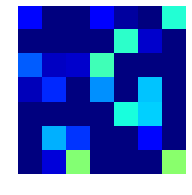
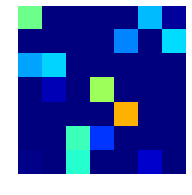
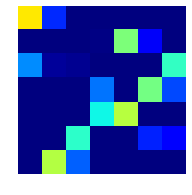
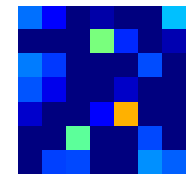
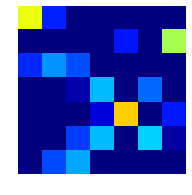
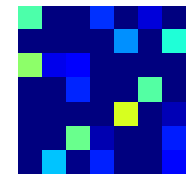
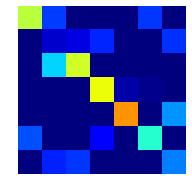
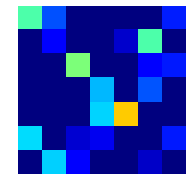
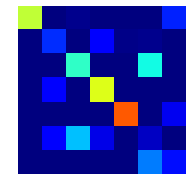
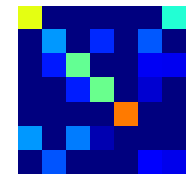
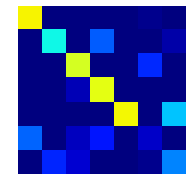
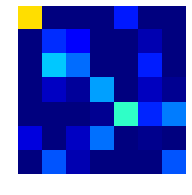
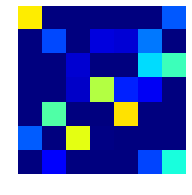
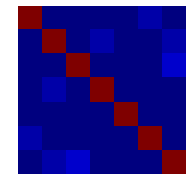
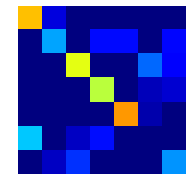
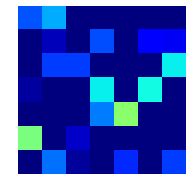
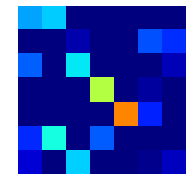
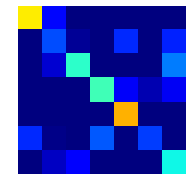
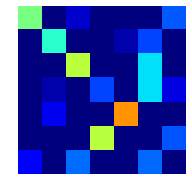
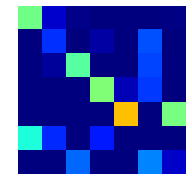
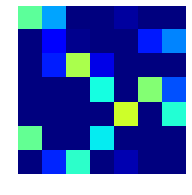
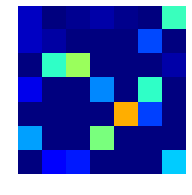
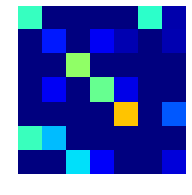
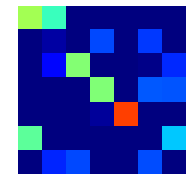
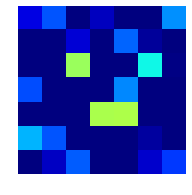
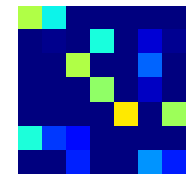
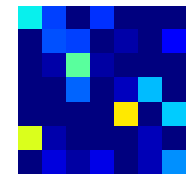
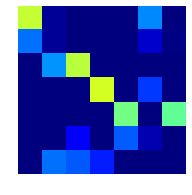
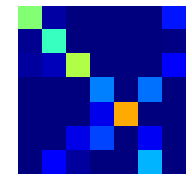
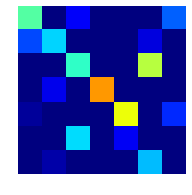
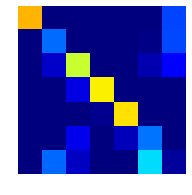
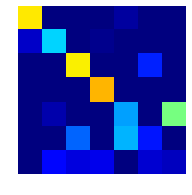
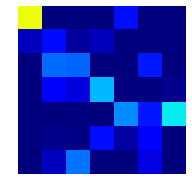
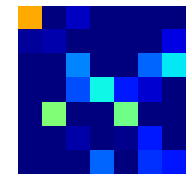
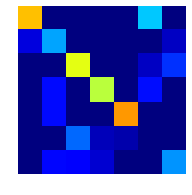
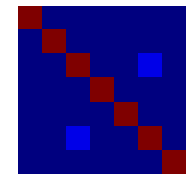
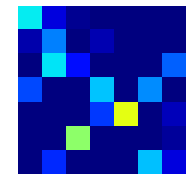
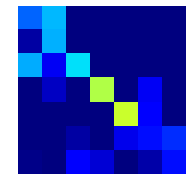
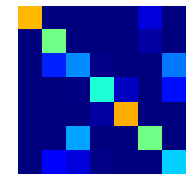
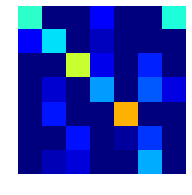
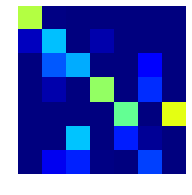
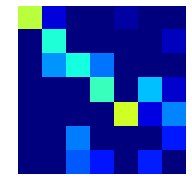
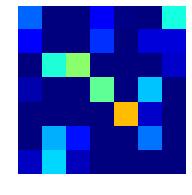
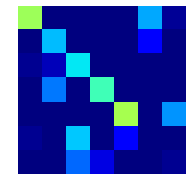
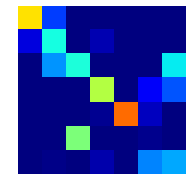
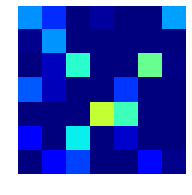
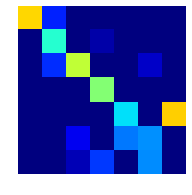
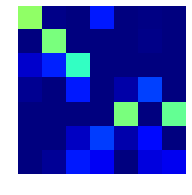
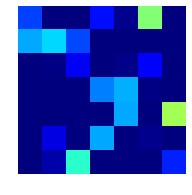
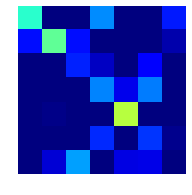
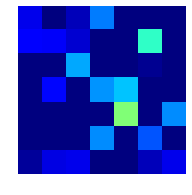
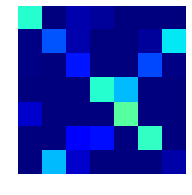
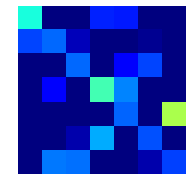
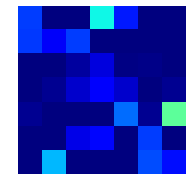
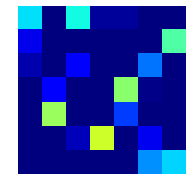
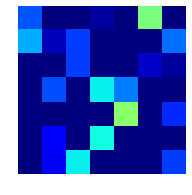
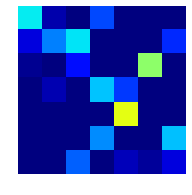
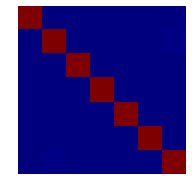
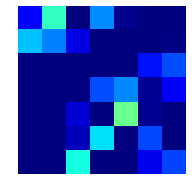
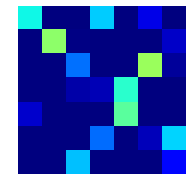
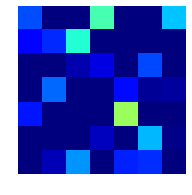
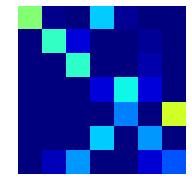
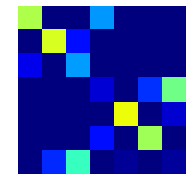
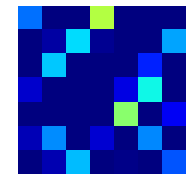
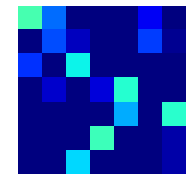
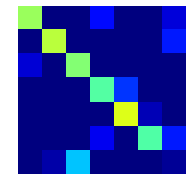
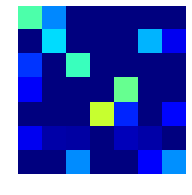
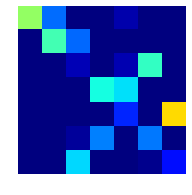
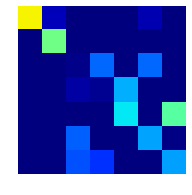
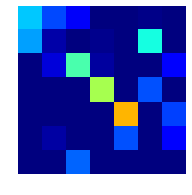
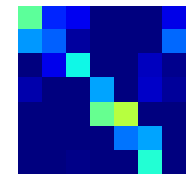
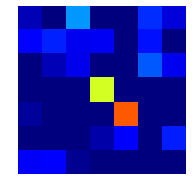
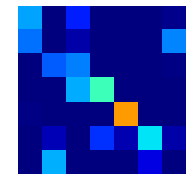
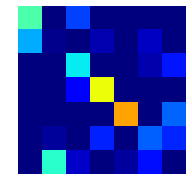
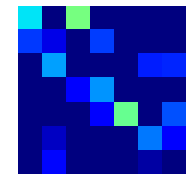
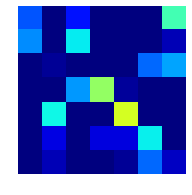
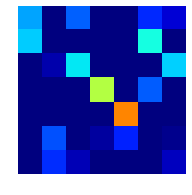
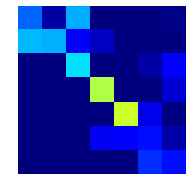
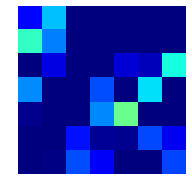
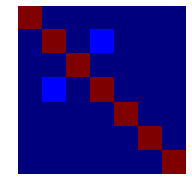
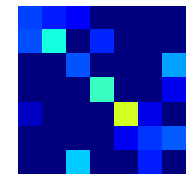
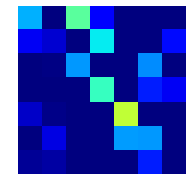
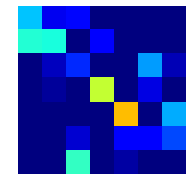
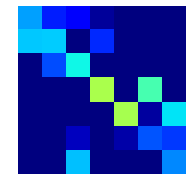
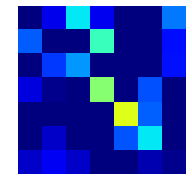
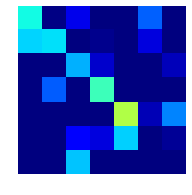
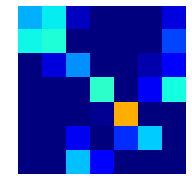
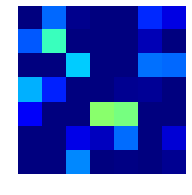
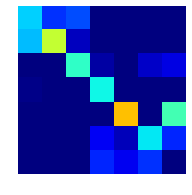
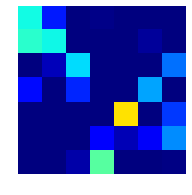
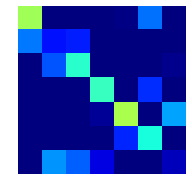
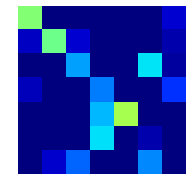
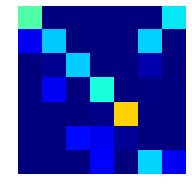
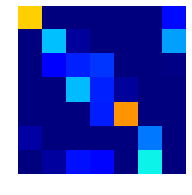
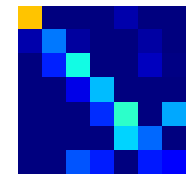
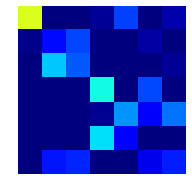
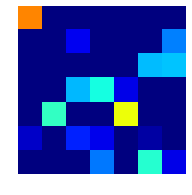
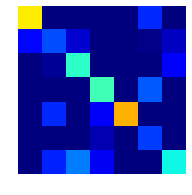
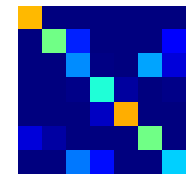
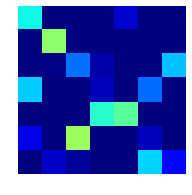
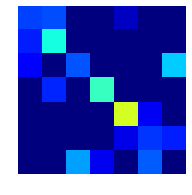
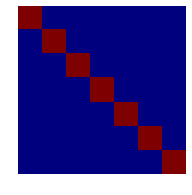
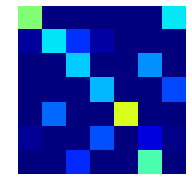
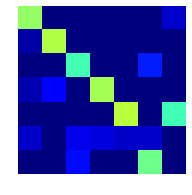
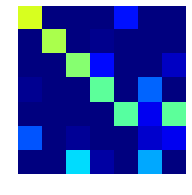
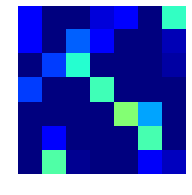
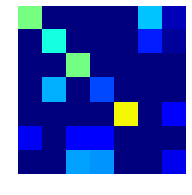
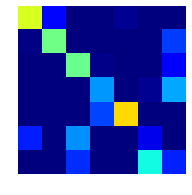
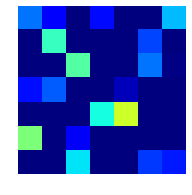
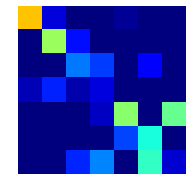
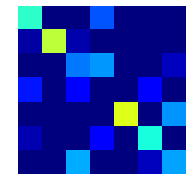
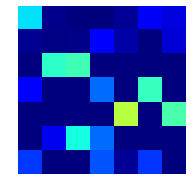
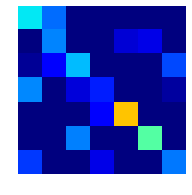
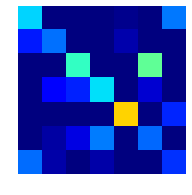
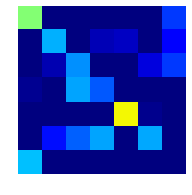
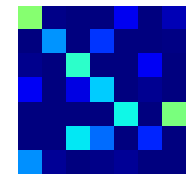
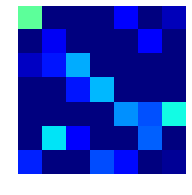
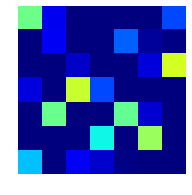
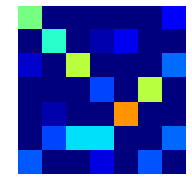
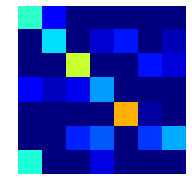
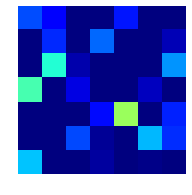
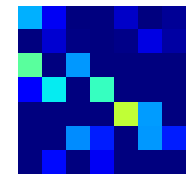
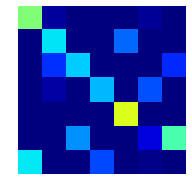
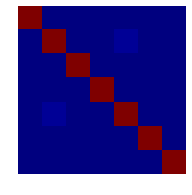
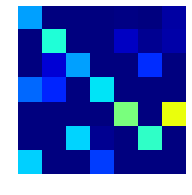
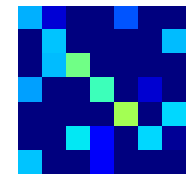
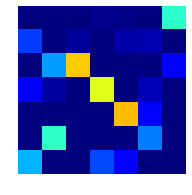
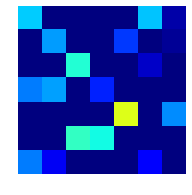
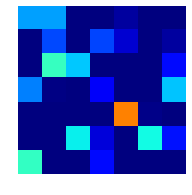
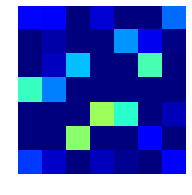
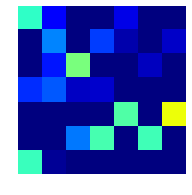
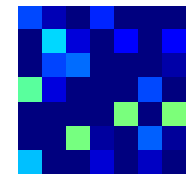
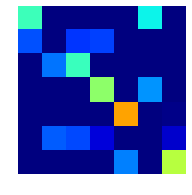
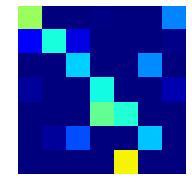
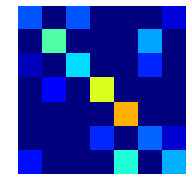
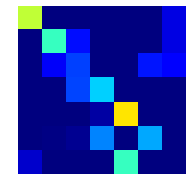
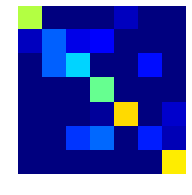
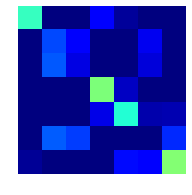
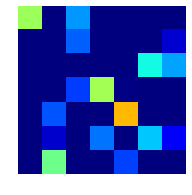
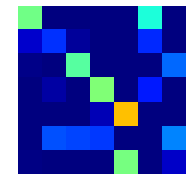
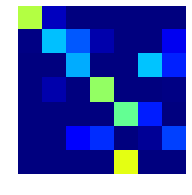
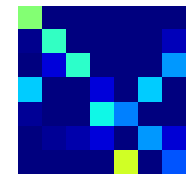
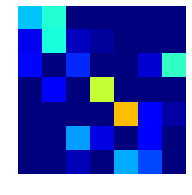
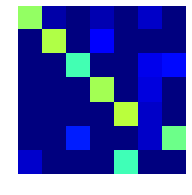
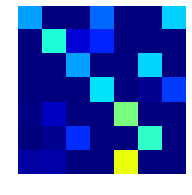
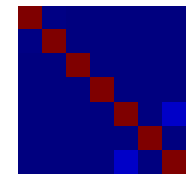
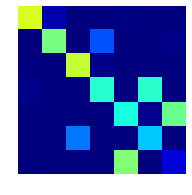
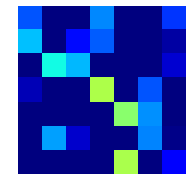
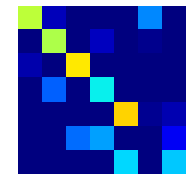
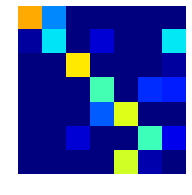
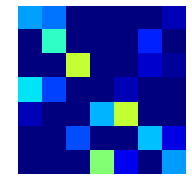
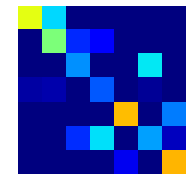
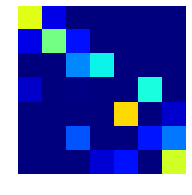
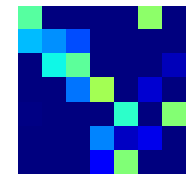
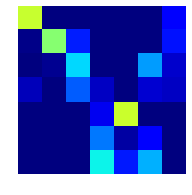
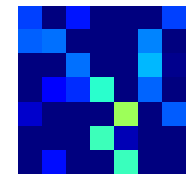
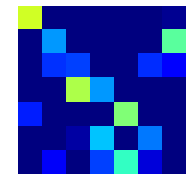
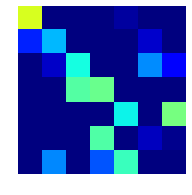
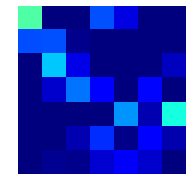
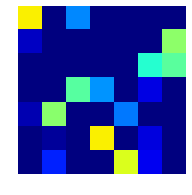
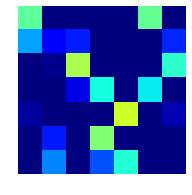
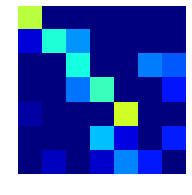
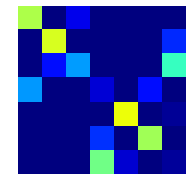
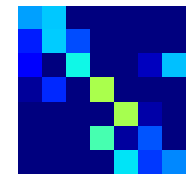
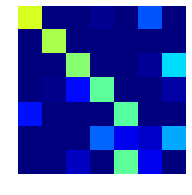
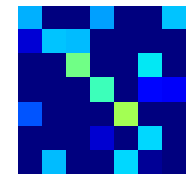
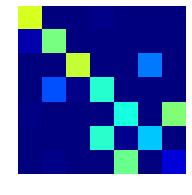
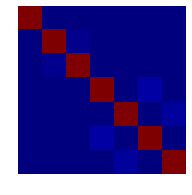
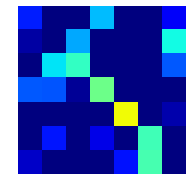
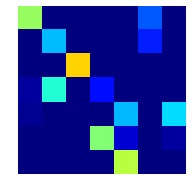
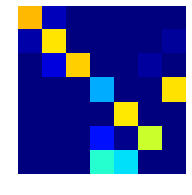
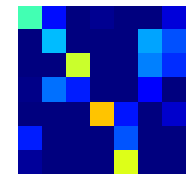
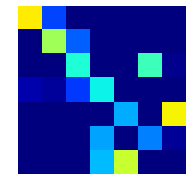
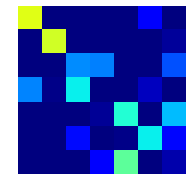
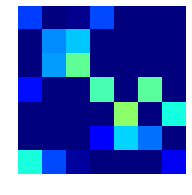
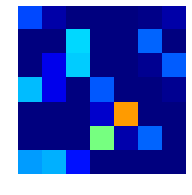
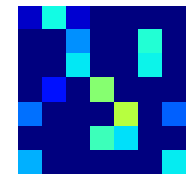
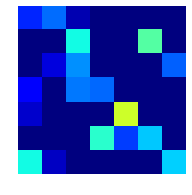
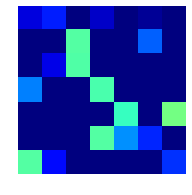
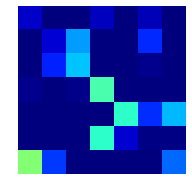
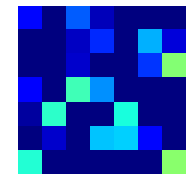
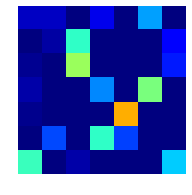
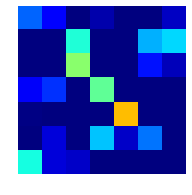
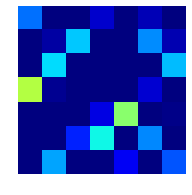
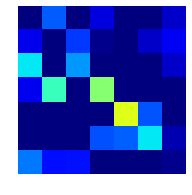
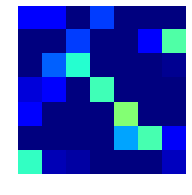
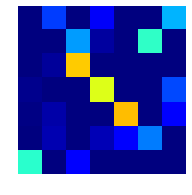
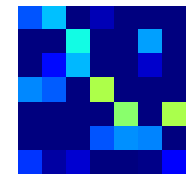
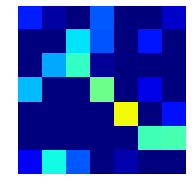
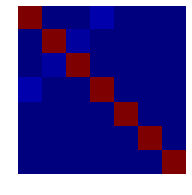
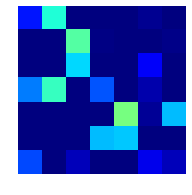
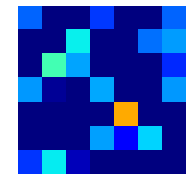
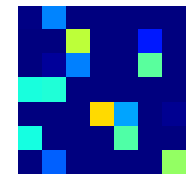
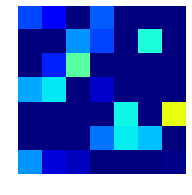
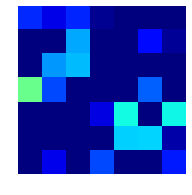
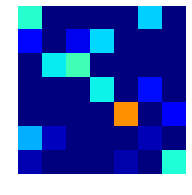
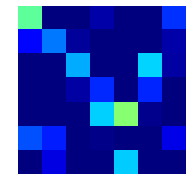
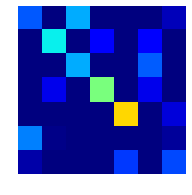
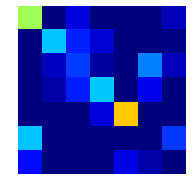
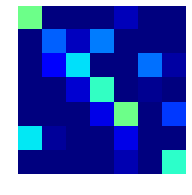
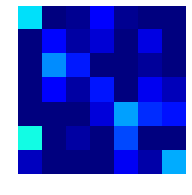
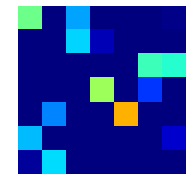
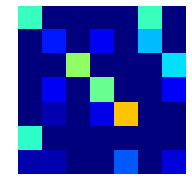
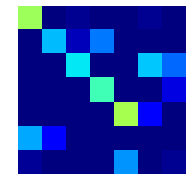
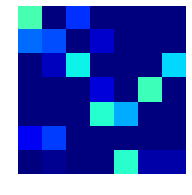
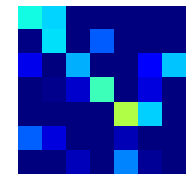
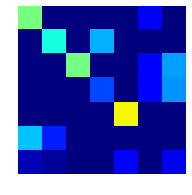
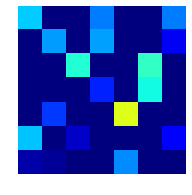
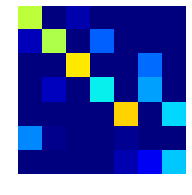
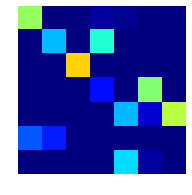
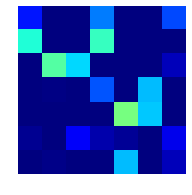
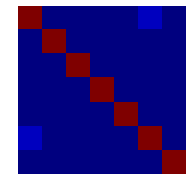
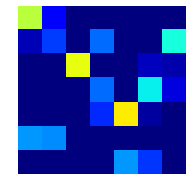
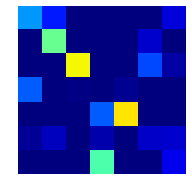
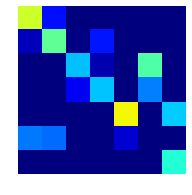
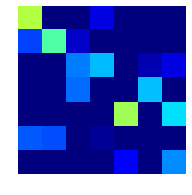
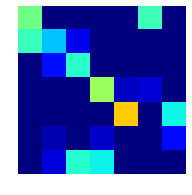
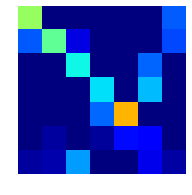
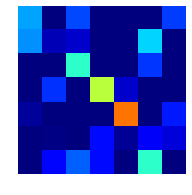
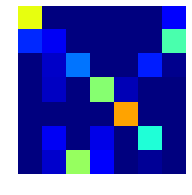
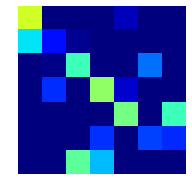
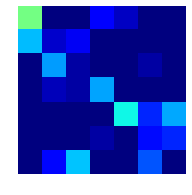
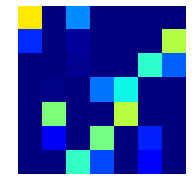
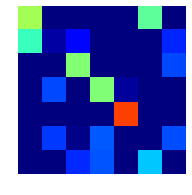
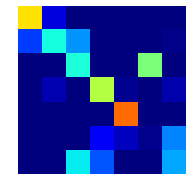
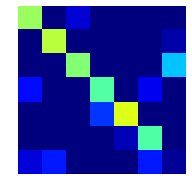
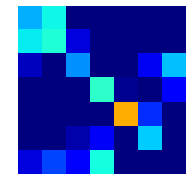
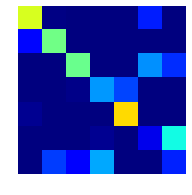
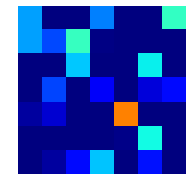
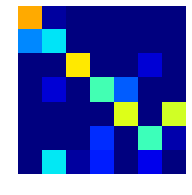
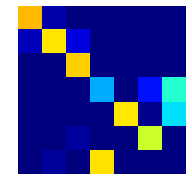
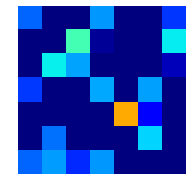
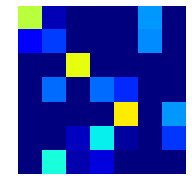
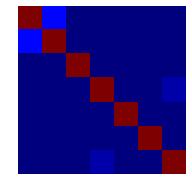
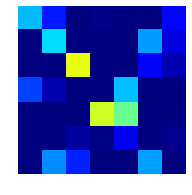
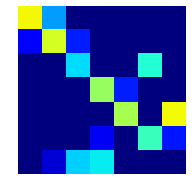
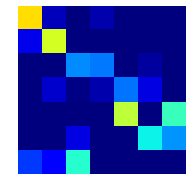
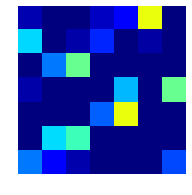
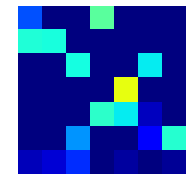
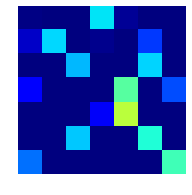
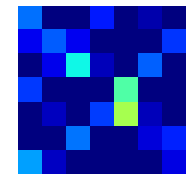
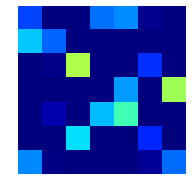
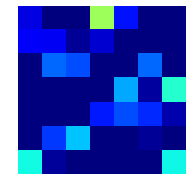
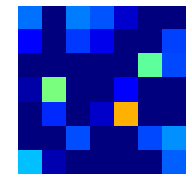
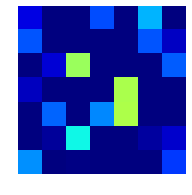
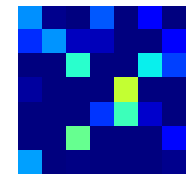
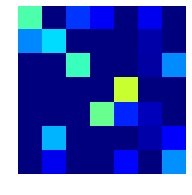
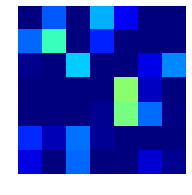
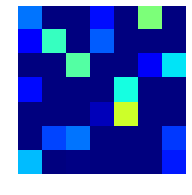
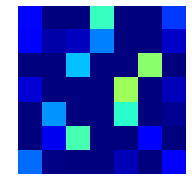
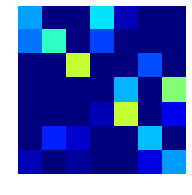
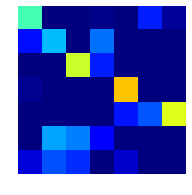
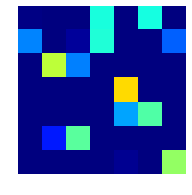
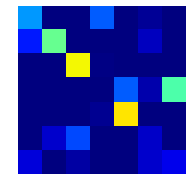
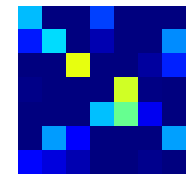
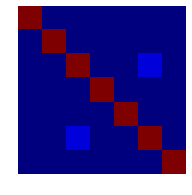
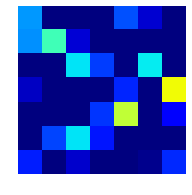
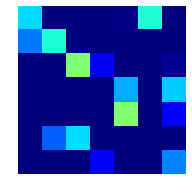
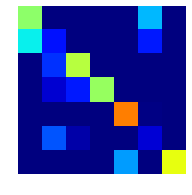
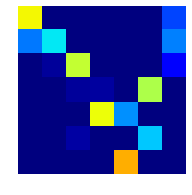
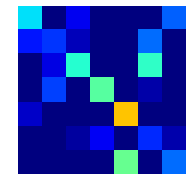
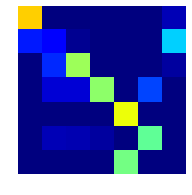
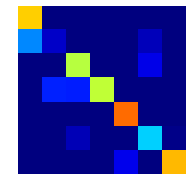
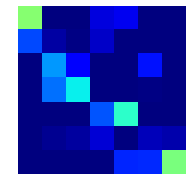
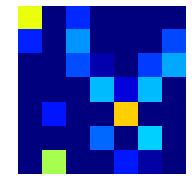
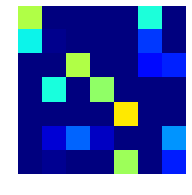
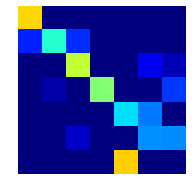
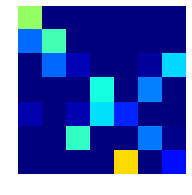
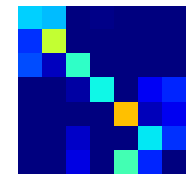
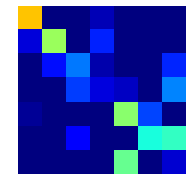
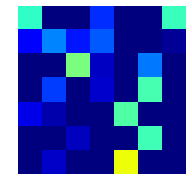
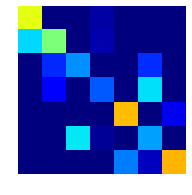
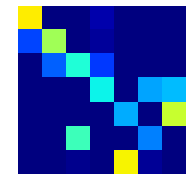
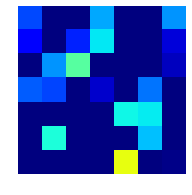
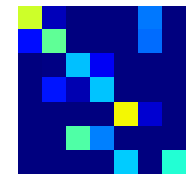
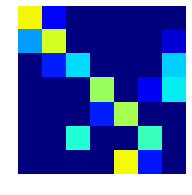
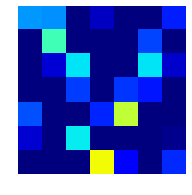
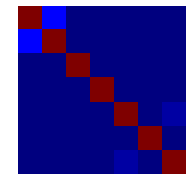
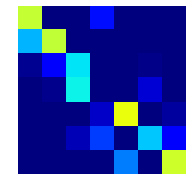
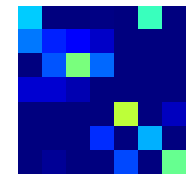
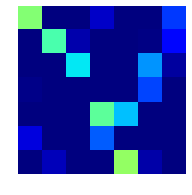
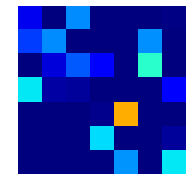
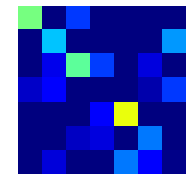
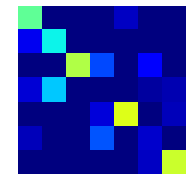
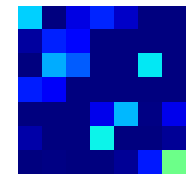
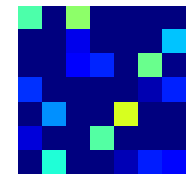
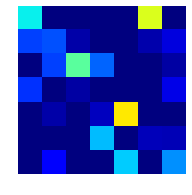
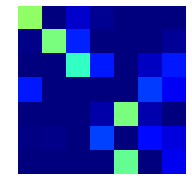
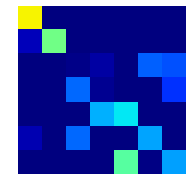
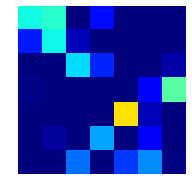
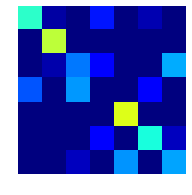
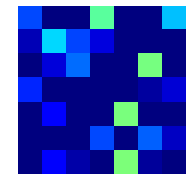
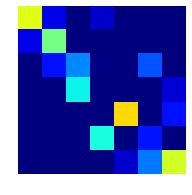
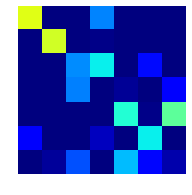
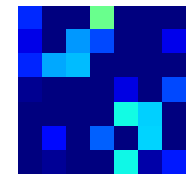
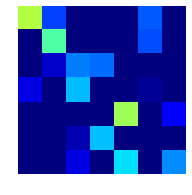
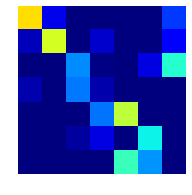
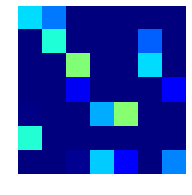
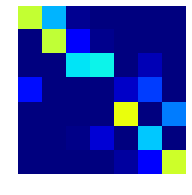
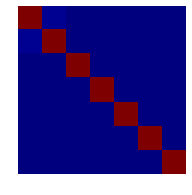

In [15]:
Td.htmlTable(figs, col=KS, lign=KS, fmt="%s")

In [63]:
corr2 = empty((3,len(KS),len(K),len(K)))
for i1, k1 in zip(range(3), ['g','p','c']):
    for i2, k2 in zip(range(len(KS)), KS):
        corr2[i1,i2] = Tf.corrTCs(clus[k1], clus[k2])

In [21]:
figs2 = []
for i1, k1 in zip(range(3), ['g','p','c']):
    figs2.append([])
    for i2, k2 in zip(range(len(KS)), KS):
        fig=figure(figsize=(3,3), dpi=10)
        imshow(corr2[i1,i2], interpolation='nearest', vmin=0, vmax=1)
        axis('off')
        figs2[i1].append( Td.figToHtml(fig) );
        close()


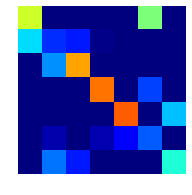
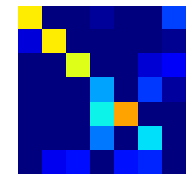
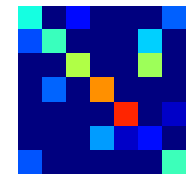
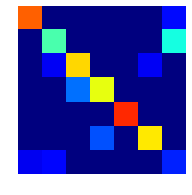
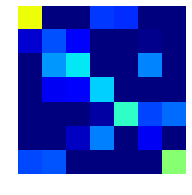
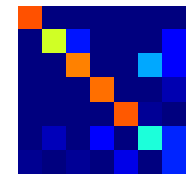
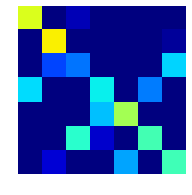
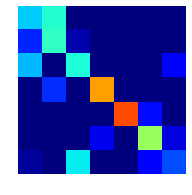
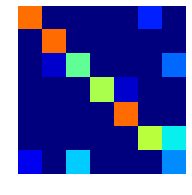
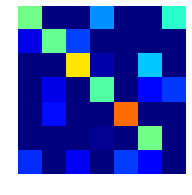
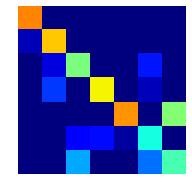
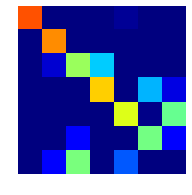
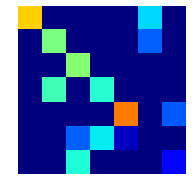
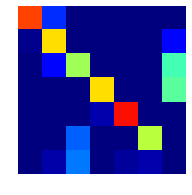
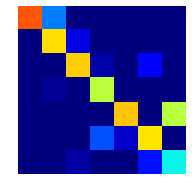
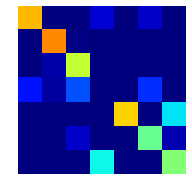
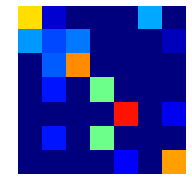
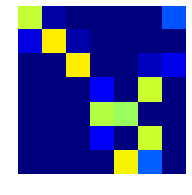
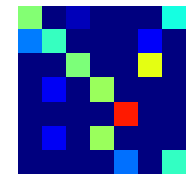
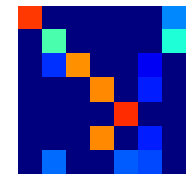
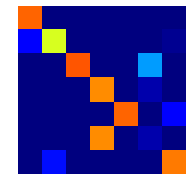
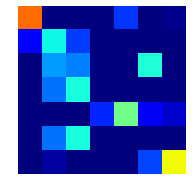
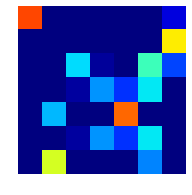
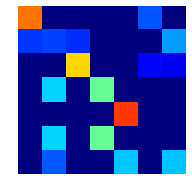
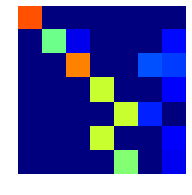
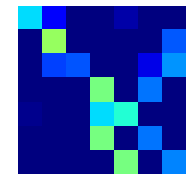
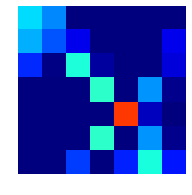
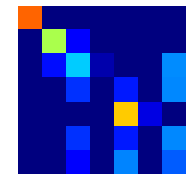
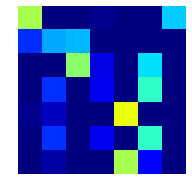
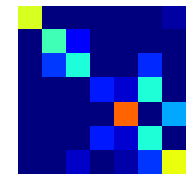
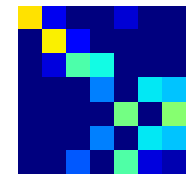
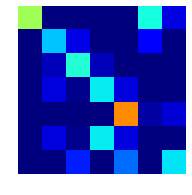
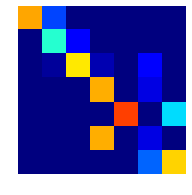
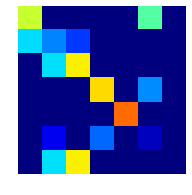
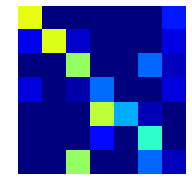
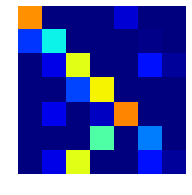
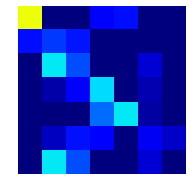
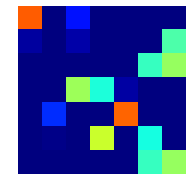
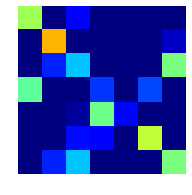
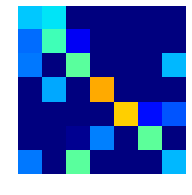
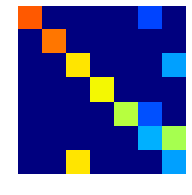
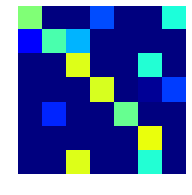
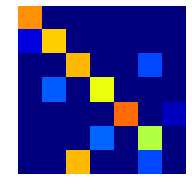
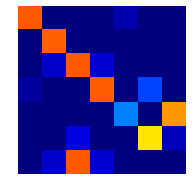
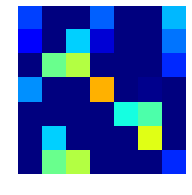
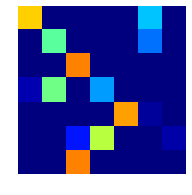
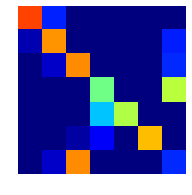
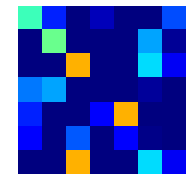
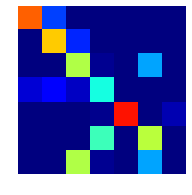
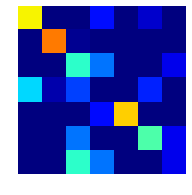

In [18]:
Td.htmlTable(figs2, col=KS, lign=['g','p','c'], fmt="%s")

## Variability

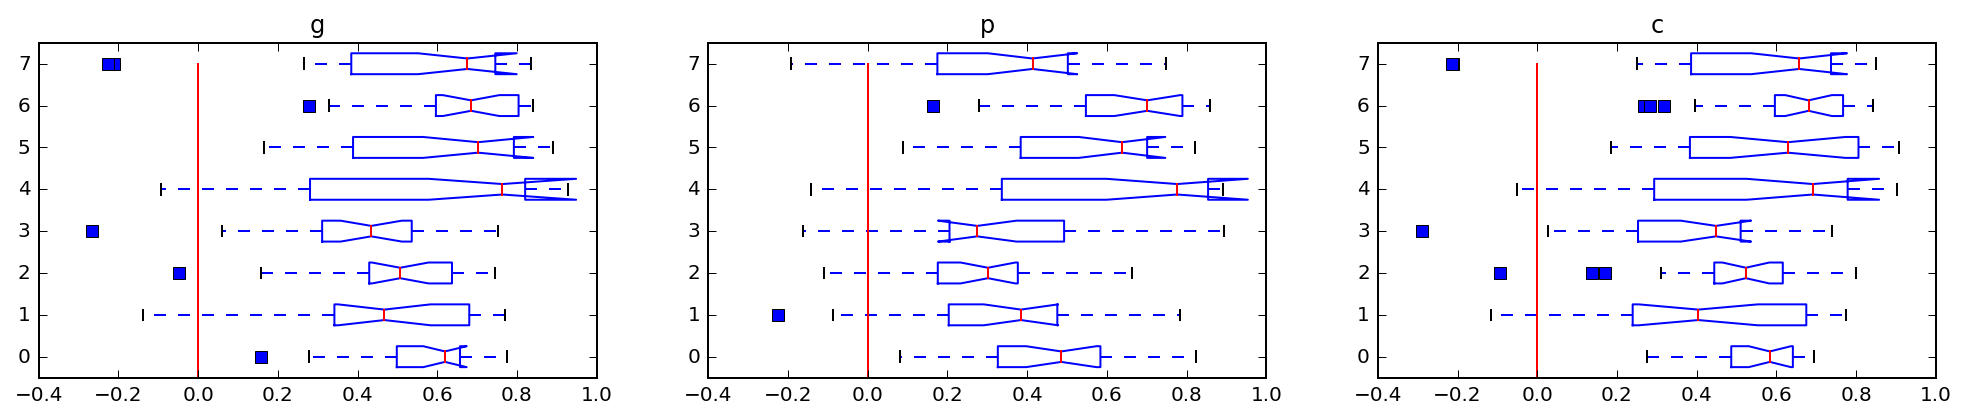

In [26]:
# TCHD12B
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

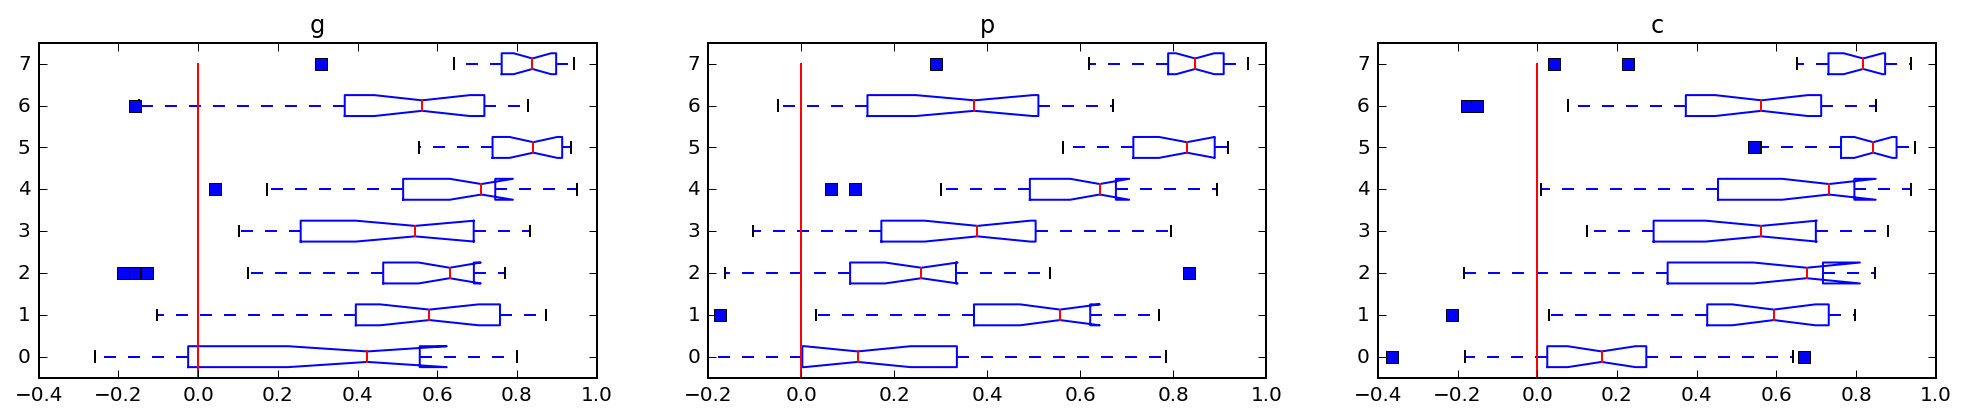

In [23]:
# TCHDA86B
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

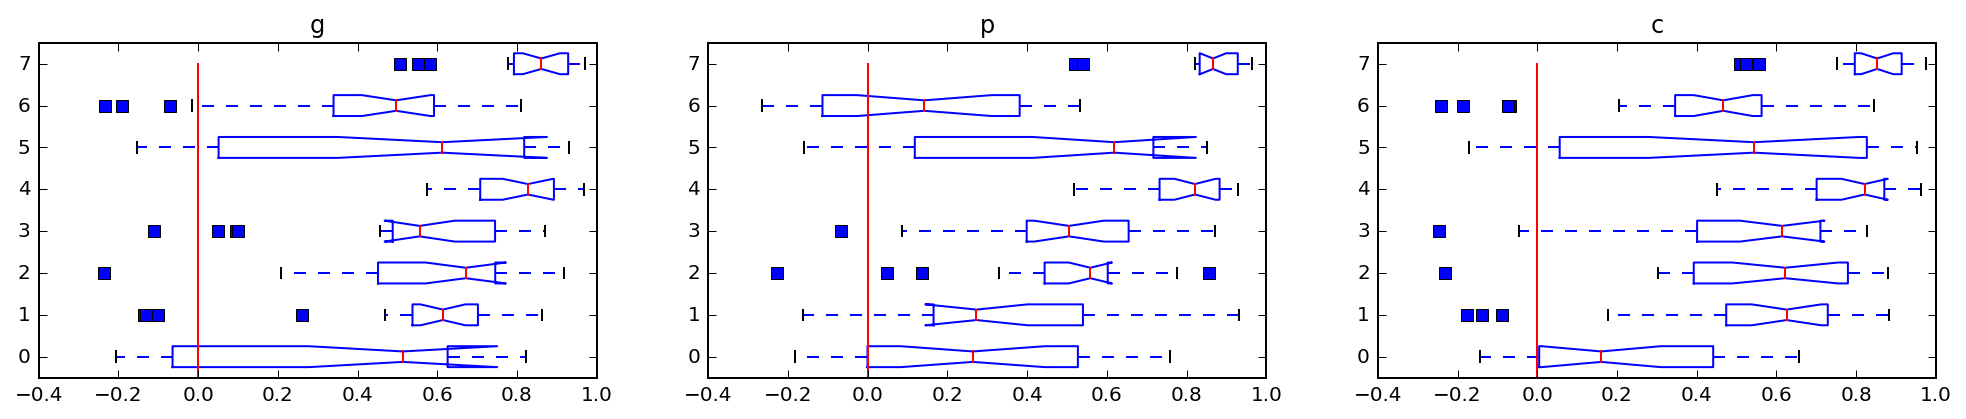

In [32]:
# TCHD1286B
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

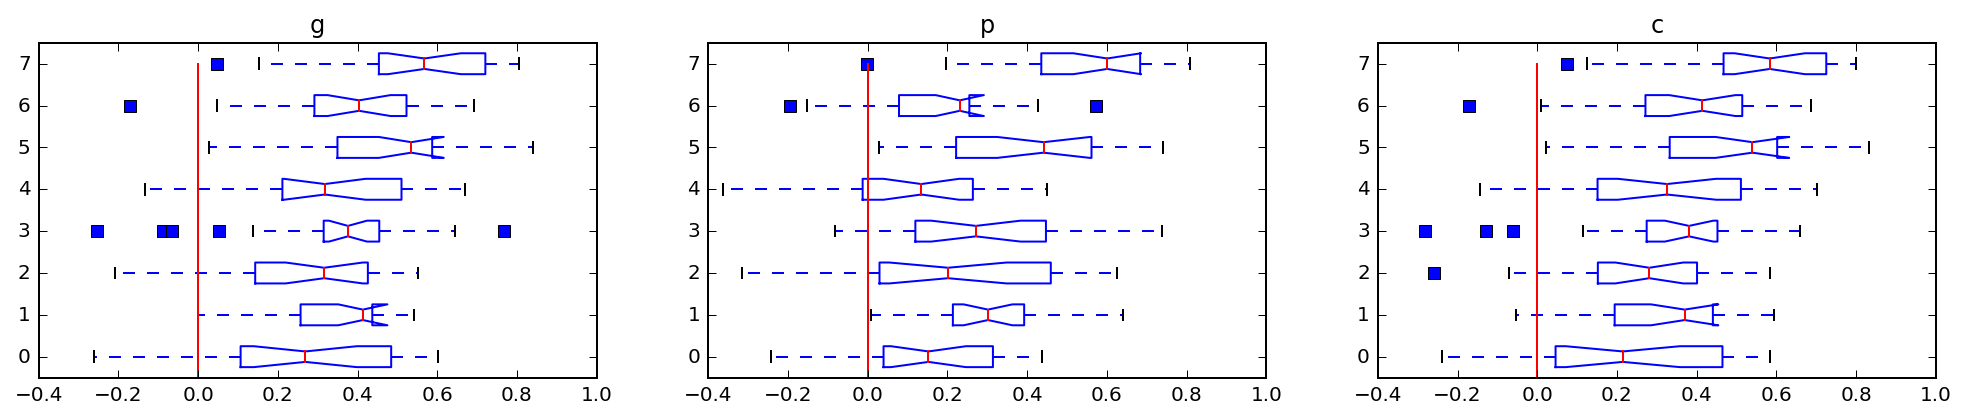

In [40]:
# TCPDAB
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

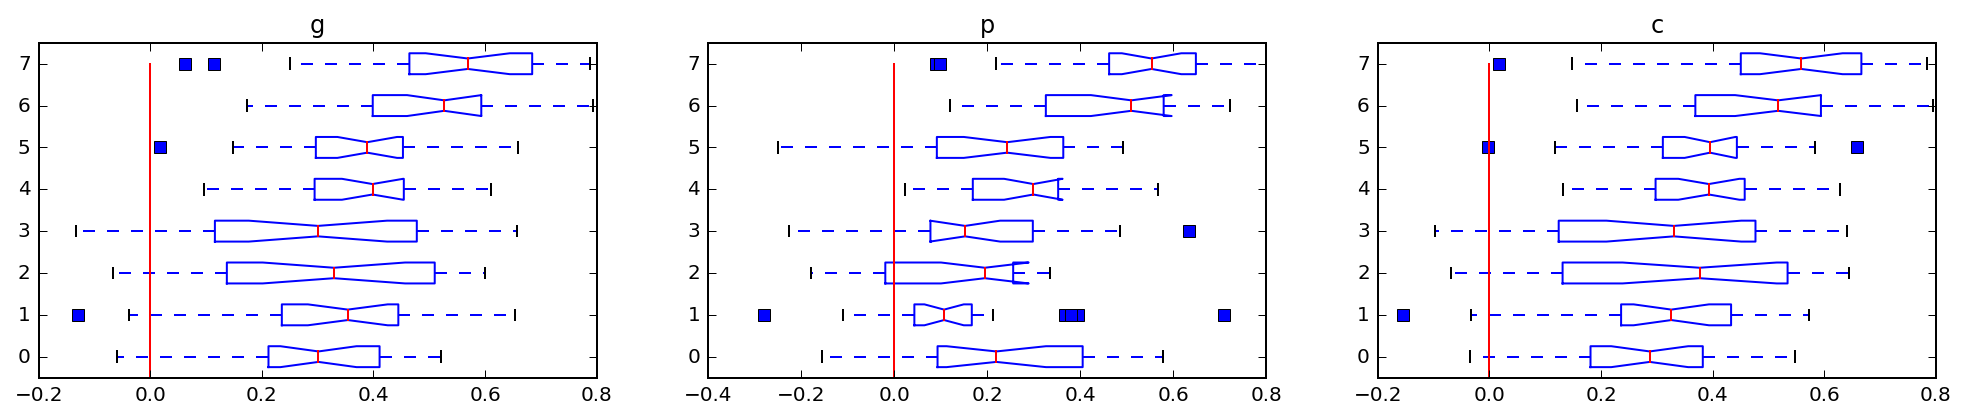

In [48]:
# TCPD12B
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

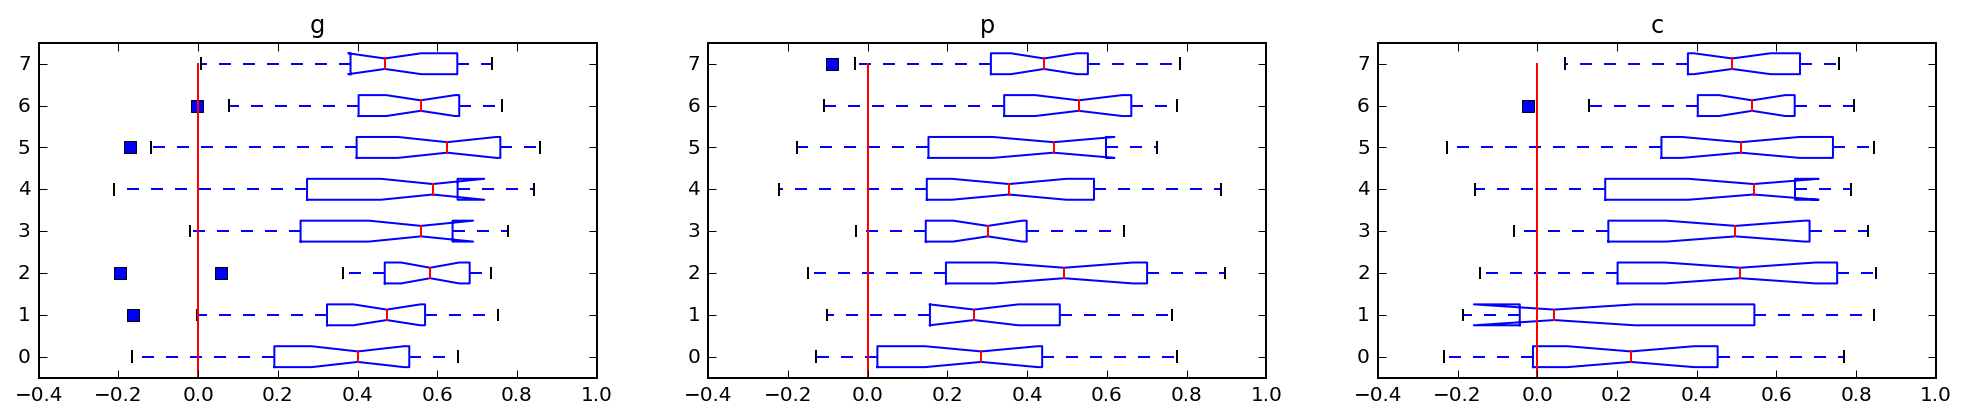

In [56]:
# TCPDAB86
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

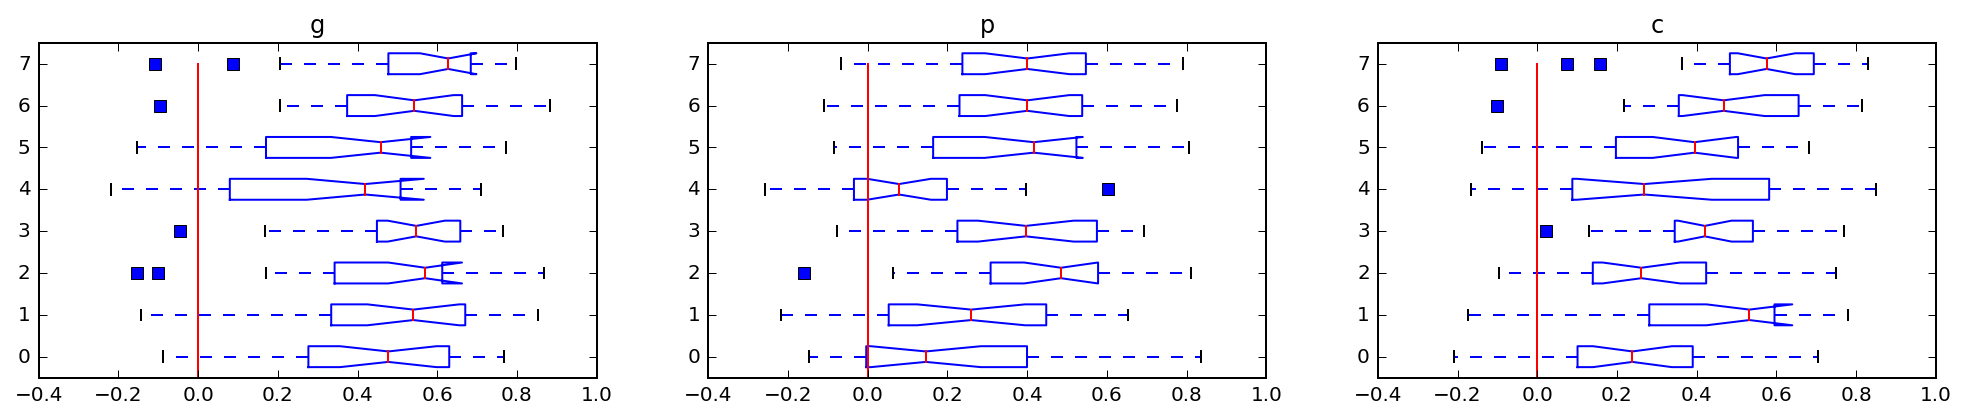

In [64]:
# TCPD12B86
figure(figsize=(17,3))
for i1, k1 in zip(range(3), ['g','p','c']):
    tmp = array([diag(corr2[i1,k]) for k in range(len(KS))])
    subplot(1,3,i1+1); boxplot(tmp[:,::-1][::-1], labels=K, notch=1, sym='rs', vert=0); plot([0,0],[0,8],'r'); title(k1);

# Visualization


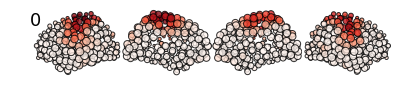
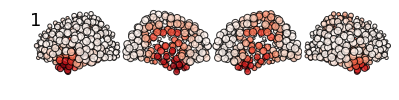
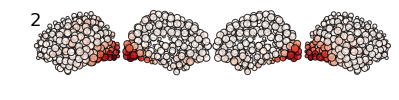
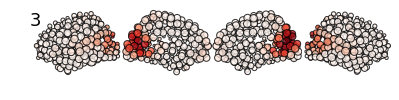
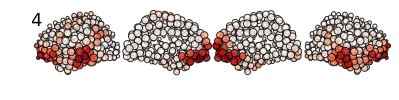
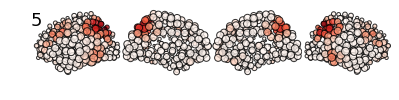
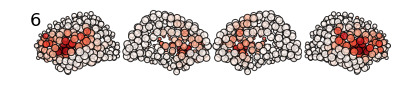
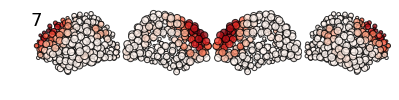

In [31]:
showMe(clus = clus['g'])

In [ ]:
showMe(clus = clus['g'], cmap='Blues')


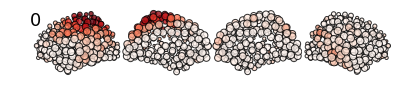
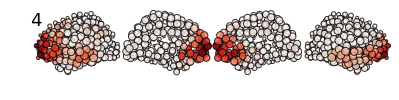
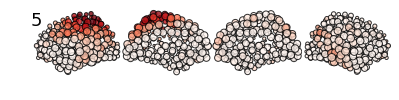
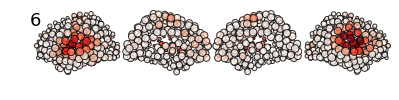
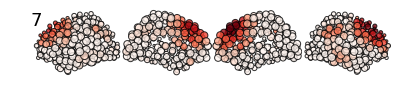

In [32]:
showMe(clus = clus['p'])


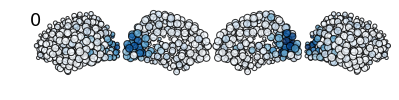
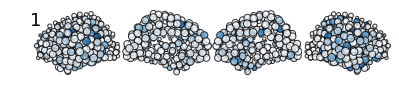
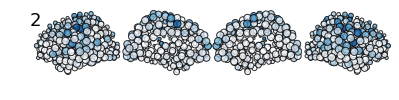
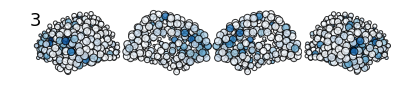
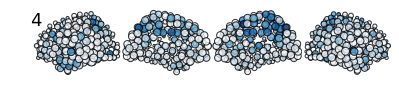
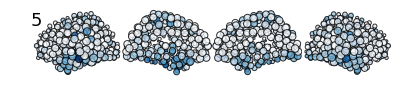
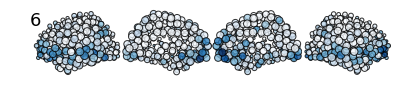
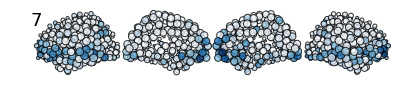

In [54]:
showMe(clus = clus['p'], cmap='Blues')


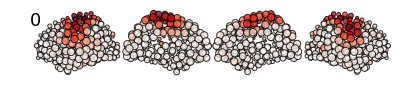
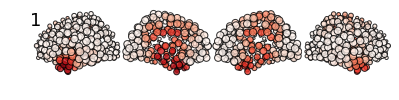
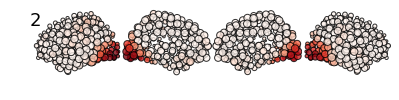
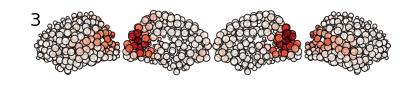
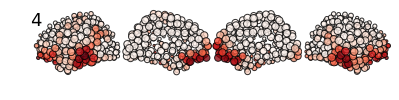
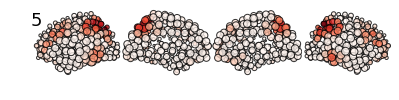
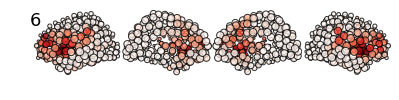
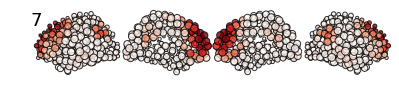

In [33]:
showMe(clus = clus['c'])


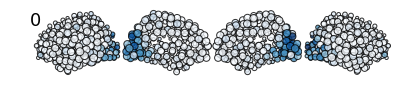
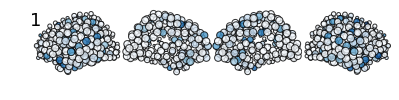
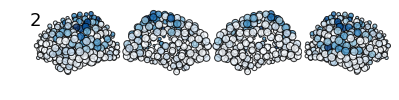
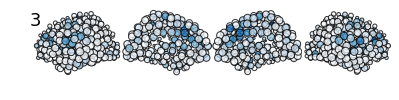
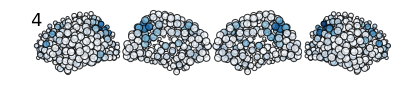
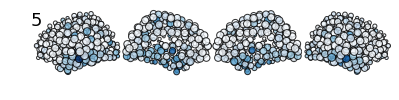
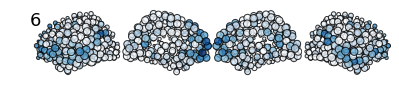
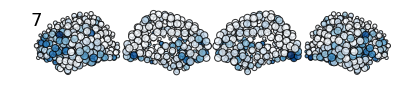

In [55]:
showMe(clus = clus['c'], cmap='Blues')

- Before : Binarization done after clustering
- After :  Binarization done before clustering


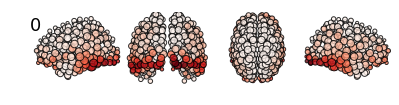
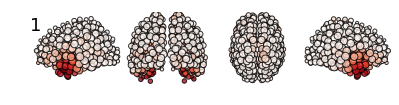
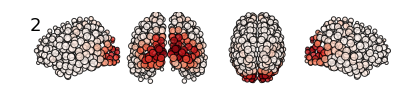
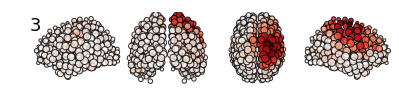
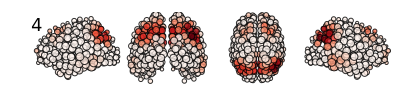
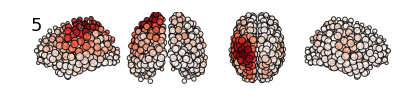
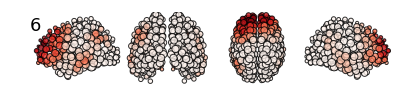

In [58]:
showMe(comp['TCDAHB']['g'])

## Groups

In [ ]:
tmp = Te.data2array('../../Connectomes/Jonathan/512/centres/p06.npy')
org, cen = tmp[:,0].astype(int)-1, tmp[:,1:]

In [ ]:
for k in K:
    Td.linesFromCenters(clus[:,k][org], cen, fig=figure(figsize=(10,2)), intext=0, cbar=1, cmap='Blues', alpha=0.8, tle=k)

In [ ]:
Td.linesFromCenters(clus.sum(1)[org], cen, fig=figure(figsize=(10,2)), 
                    intext=0, cbar=1, vmin=0, vmax=3.5, cmap='Blues', alpha=0.8, tle="Sum")

In [ ]:
hist(clus.flatten(), linspace(0,3,20), log=1);
hist(clus.flatten(), linspace(0.000001,3,20), log=1);

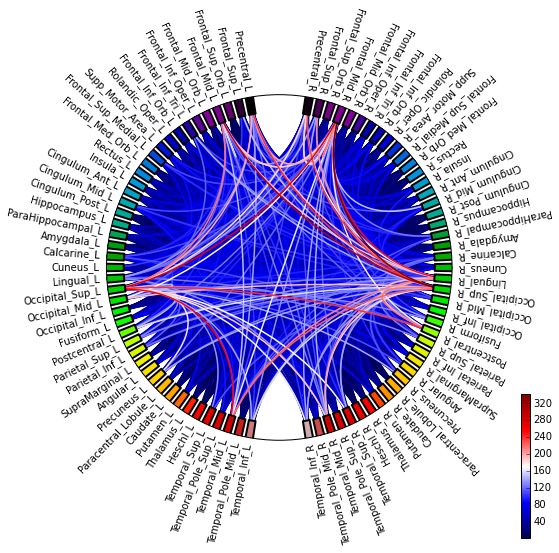

In [300]:
Td.circular(allLines2[:,chub[0]], down=dow, cmap='seismic', lbl=lbl)